In [1]:
import numpy as np
import pandas as pd
import shap

rng = np.random.default_rng()

In [2]:
def clf(x: pd.DataFrame):
    age_check = x["age"] >= 16
    height_check = x["height"] >= 1.25
    return np.all([age_check, height_check], axis=0).astype(int)

$$
age \sim Uniform(0,\ 99)
$$

$$
height \sim Uniform(0.3,\ 2)
$$

In [3]:
def data_gen_uniform(n=100):
    age = rng.integers(0, 99, n)
    height = 0.3 + (2 - 0.3) * rng.random(n)
    happy = rng.choice([0, 1], n)
    return pd.DataFrame({
        "age": age,
        "height": height,
        "happy": happy
    })

In [4]:
masker_sample = data_gen_uniform()
explainer = shap.Explainer(clf, masker_sample)

### Uniform sampling

In [5]:
uniform_sample = data_gen_uniform(1000)
shap_values_uniform = explainer(uniform_sample)

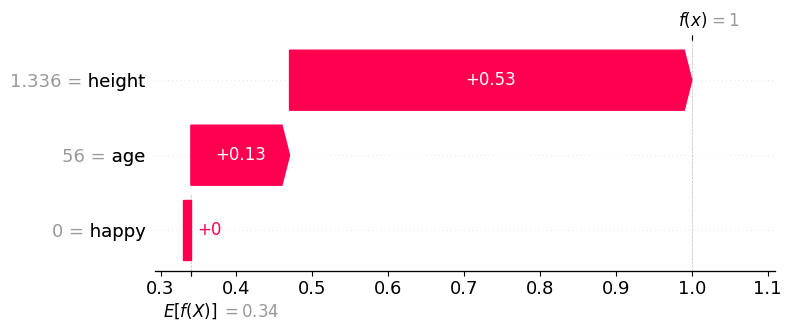

In [6]:
shap.plots.waterfall(shap_values_uniform[1])

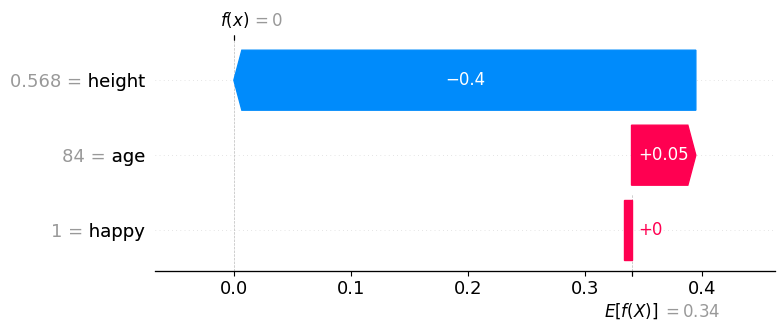

In [7]:
shap.plots.waterfall(shap_values_uniform[500])

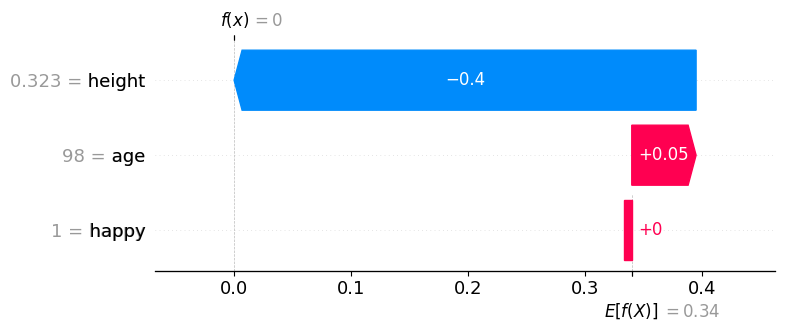

In [8]:
shap.plots.waterfall(shap_values_uniform[999])

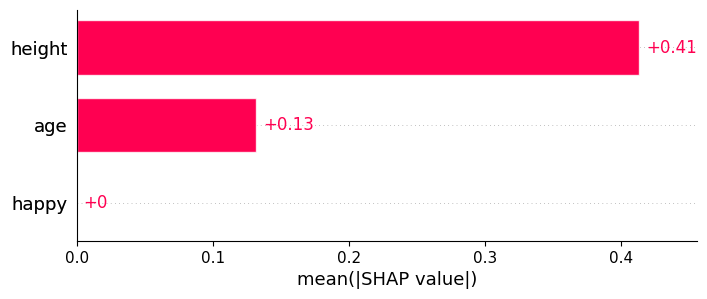

In [9]:
shap.plots.bar(shap_values_uniform)

### Age change

In [10]:
def data_gen_age_change(n=100):
    age = rng.integers(12, 99, n)
    height = 0.3 + (2 - 0.3) * rng.random(n)
    happy = rng.choice([0, 1], n)
    return pd.DataFrame({
        "age": age,
        "height": height,
        "happy": happy
    })

In [11]:
age_change_sample = data_gen_age_change(1000)
shap_values_age_change = explainer(age_change_sample)

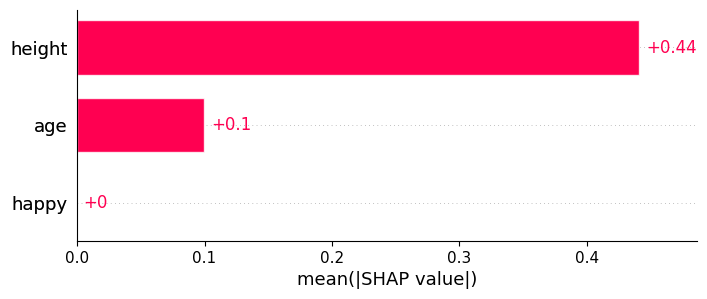

In [12]:
shap.plots.bar(shap_values_age_change)